In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install konlpy

Epoch 1/500
13/13 [==============================] - 15s 301ms/step - loss: 6.4093 - accuracy: 0.6856 - val_loss: 3.1594 - val_accuracy: 0.7113
Epoch 2/500
13/13 [==============================] - 2s 158ms/step - loss: 2.4403 - accuracy: 0.7452 - val_loss: 2.8723 - val_accuracy: 0.7113
Epoch 3/500
13/13 [==============================] - 2s 165ms/step - loss: 2.1459 - accuracy: 0.7452 - val_loss: 2.5520 - val_accuracy: 0.7113
Epoch 4/500
13/13 [==============================] - 1s 87ms/step - loss: 1.9798 - accuracy: 0.7452 - val_loss: 2.5235 - val_accuracy: 0.7113
Epoch 5/500
13/13 [==============================] - 2s 134ms/step - loss: 1.9100 - accuracy: 0.7452 - val_loss: 2.5370 - val_accuracy: 0.7113
Epoch 6/500
13/13 [==============================] - 1s 74ms/step - loss: 1.8607 - accuracy: 0.7452 - val_loss: 2.5520 - val_accuracy: 0.7113
Epoch 7/500
13/13 [==============================] - 1s 75ms/step - loss: 1.8248 - accuracy: 0.7452 - val_loss: 2.5422 - val_accuracy: 0.7113
E

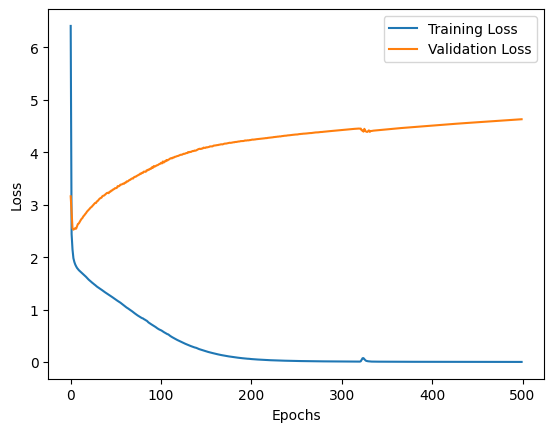

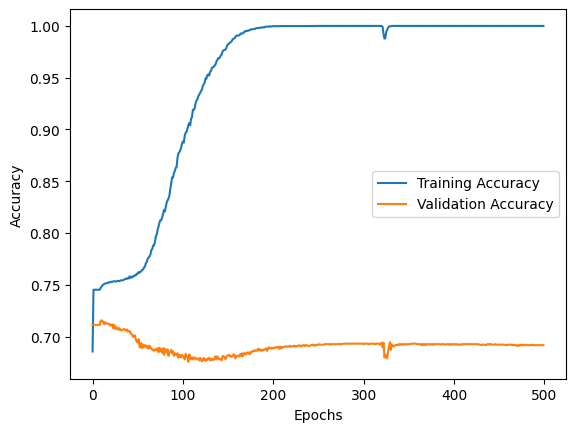

In [ ]:
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

data_folder = '/content/drive/MyDrive/bing/ohta/testtest'

def load_data(data_folder):

    with open(data_folder + "/data.txt", "r", encoding="utf-8") as f:
        lines = f.readlines()

    original_texts = []
    corrected_texts = []

    for line in lines:
        original, corrected = line.strip().split("/")
        original_texts.append(original)
        corrected_texts.append(corrected)

    return original_texts, corrected_texts

original_texts, corrected_texts = load_data(data_folder)

okt = Okt()

def tokenize(texts):
    tokenized_texts = []
    for text in texts:
        tokens = okt.morphs(text)
        tokenized_texts.append(tokens)
    return tokenized_texts

tokenized_original_texts = tokenize(original_texts)
tokenized_corrected_texts = tokenize(corrected_texts)

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(tokenized_original_texts + tokenized_corrected_texts)

vocab_size = len(tokenizer.word_index) + 1

original_sequences = tokenizer.texts_to_sequences(tokenized_original_texts)
corrected_sequences = tokenizer.texts_to_sequences(tokenized_corrected_texts)

max_length = max(max(len(seq) for seq in original_sequences), max(len(seq) for seq in corrected_sequences))
padded_original_sequences = pad_sequences(original_sequences, maxlen=max_length, padding="post")
padded_corrected_sequences = pad_sequences(corrected_sequences, maxlen=max_length, padding="post")

X_train = padded_original_sequences
y_train = tf.keras.utils.to_categorical(padded_corrected_sequences, num_classes=vocab_size)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Dense(vocab_size, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=500, batch_size=32,validation_split=0.2)

loss, accuracy = model.evaluate(X_train, y_train)
print(f"모델의 정확도: {accuracy}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()